In [5]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://media.githubusercontent.com/media/KhalPrawira/Machine-Learning-Course/refs/heads/main/UTS/Dataset/RegresiUTSTelkom.csv"
df = pd.read_csv(url)

print(df.head())
print(df.isnull().sum())

df = df.fillna(df.median())
print(df.dtypes)


   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

In [3]:
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(f"Shape after outlier handling: {df.shape}")

print(df.dtypes)

display(df.head())


2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64
Shape after removing duplicates: (515130, 91)
Shape after outlier handling: (37269, 91)
2001           int64
49.94357     float64
21.47114     float64
73.0775      float64
8.74861      float64
              ...   
-23.08793    float64
68.40795     float64
-1.82223     float64
-27.46348    float64
2.26327      float64
Length: 91, dtype: object


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
18,1987,39.71092,-4.92800,12.88590,-11.87773,2.48031,-16.11028,-16.40421,-8.29657,9.86817,...,11.92816,-73.72412,16.19039,9.79606,9.71693,-9.90907,-20.65851,2.34002,-31.57015,1.58400
25,1996,45.84368,38.11148,-8.63596,-13.28665,-38.21077,-14.98402,-0.18219,-5.22133,1.20037,...,10.73204,-78.91793,37.25806,8.81152,13.84919,41.64984,-65.59314,9.52777,16.43339,4.45222
29,1997,45.52338,2.79013,8.00527,-9.91837,7.54397,-17.30311,5.51034,-3.38012,4.93012,...,0.99479,32.22234,10.63270,-6.13042,9.98918,9.61685,-78.58798,4.58669,2.60033,-9.13155
35,2000,50.86288,56.57130,12.01148,-9.15581,-20.46014,-16.30729,-8.77505,-7.43052,6.67630,...,-10.89199,-45.76734,5.42290,14.99974,2.21268,57.81646,4.36321,7.12878,54.21828,-3.97173
42,2000,50.76908,29.84010,16.48637,-8.54749,-24.62551,-15.91986,-1.68566,-6.65610,7.63505,...,7.02065,-10.35473,19.77636,21.40832,2.45389,-8.97767,13.42308,1.56669,39.49377,0.55789


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,...,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000,37269.000000
mean,2000.037887,49.387713,33.568444,22.813040,-4.794115,-18.610851,-19.561134,-0.861157,-1.213751,6.341311,...,1.504162,-30.899296,10.031729,25.777849,0.587815,3.377525,-14.567917,1.736699,-5.719008,-0.417197
std,7.870420,3.235156,29.981019,19.158707,7.615333,17.675453,6.824987,10.518110,4.946763,7.938712,...,7.726126,47.424478,37.210277,27.183119,4.827960,33.616431,53.044261,3.962099,47.826602,5.607403
min,1976.000000,29.350600,-112.892510,-66.852870,-32.722880,-62.975740,-41.427070,-33.795440,-19.674010,-18.560650,...,-19.871230,-163.695010,-94.447390,-51.078230,-12.777530,-89.323690,-163.723520,-9.139230,-136.760090,-15.459140
25%,1995.000000,47.637980,15.262800,10.715460,-9.750040,-30.893630,-24.459740,-7.703820,-4.461890,0.921700,...,-3.472150,-60.727230,-14.595120,7.485590,-2.593300,-18.987740,-48.205640,-0.866310,-37.293150,-3.984790
50%,2002.000000,50.089780,35.406230,22.815410,-4.824840,-18.869140,-20.173950,-0.920440,-1.107160,6.255750,...,1.076920,-28.765580,9.982040,24.808030,0.412210,2.612800,-12.201330,1.697550,-6.802090,-0.314650
75%,2006.000000,51.731040,53.710360,35.117150,0.077400,-6.516160,-15.394880,6.002760,2.155570,11.781310,...,6.088250,-0.021270,34.450580,43.459960,3.665780,25.346370,20.537770,4.333070,25.212000,3.139360
max,2010.000000,59.499770,127.405870,88.383530,30.914510,46.755950,15.522110,30.444170,15.484510,26.960950,...,24.028780,100.445790,113.795440,102.726840,14.143860,97.365240,132.278800,12.668860,125.334530,14.555600


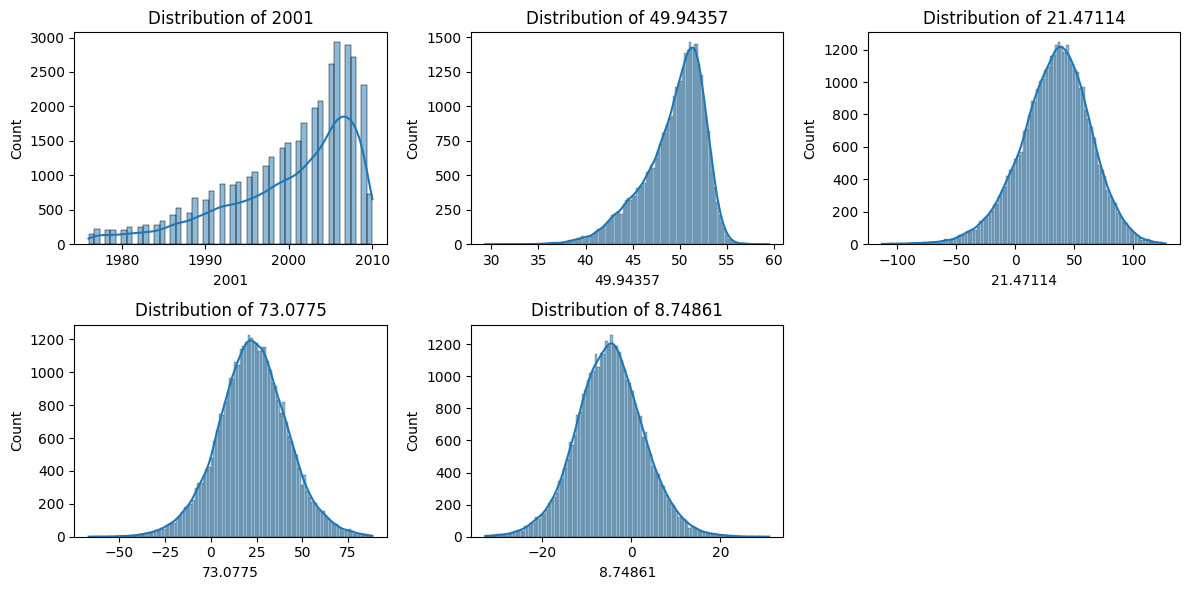

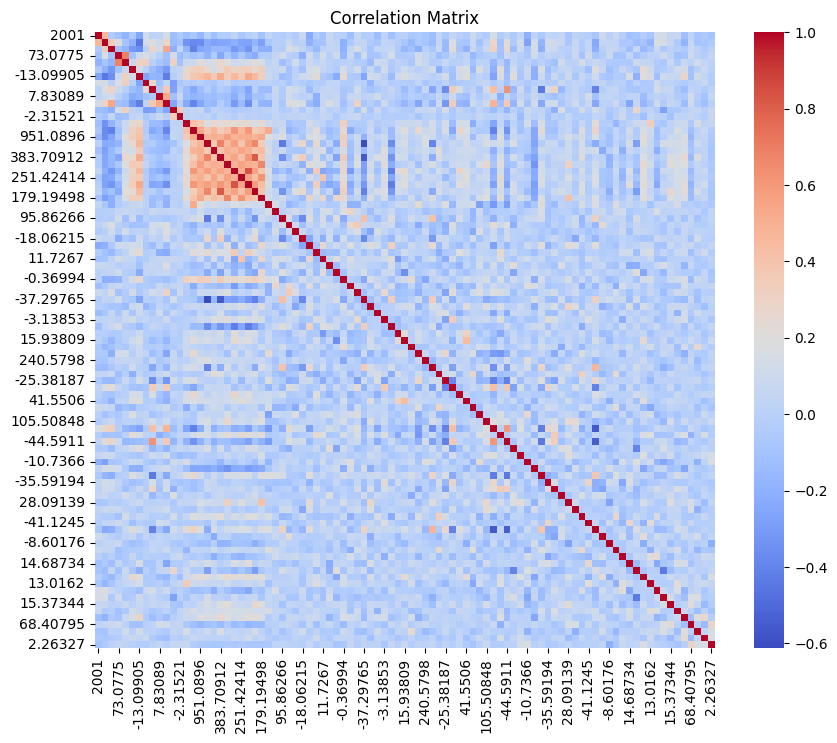

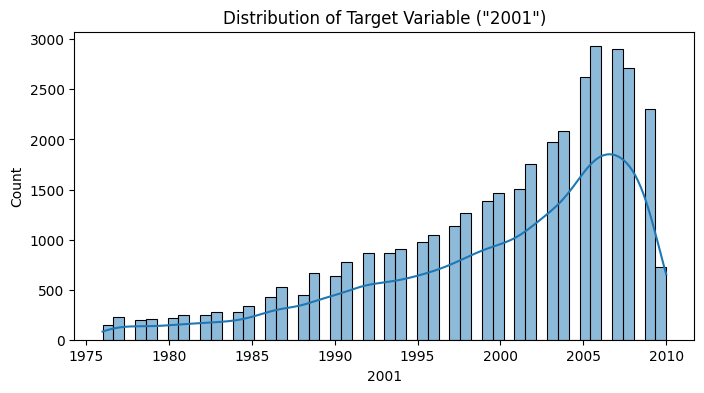

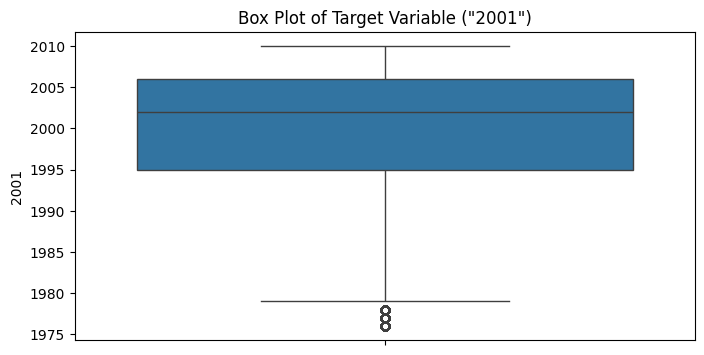

Top fitur berdasarkan Mutual Information Regression:
68.40795     0.063786
10.20556     0.058852
179.19498    0.039098
611.10913    0.032562
-8.60176     0.026165
               ...   
240.5798     0.000000
34.42438     0.000000
-44.5911     0.000000
-41.1245     0.000000
-54.32125    0.000000
Length: 90, dtype: float64


In [8]:
numerical_features = df.select_dtypes(include=['number']).columns
display(df[numerical_features].describe())

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features[:5]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['2001'], kde=True)
plt.title('Distribution of Target Variable ("2001")')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(y=df['2001'])
plt.title('Box Plot of Target Variable ("2001")')
plt.show()

target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("Top fitur berdasarkan Mutual Information Regression:")
print(mi_scores)

top_features = mi_scores.head(10).index.tolist()

X_selected = X[top_features]

In [9]:
categorical_cols = X_selected.select_dtypes(include='object').columns.tolist()

if categorical_cols:
    X_selected = pd.get_dummies(X_selected, columns=categorical_cols)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [10]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (deg=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ]),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=2),
    'Bagging Regressor': BaggingRegressor(n_estimators=10, n_jobs=-1),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=30),
    'SVR (Sampled)': SVR()
}

from sklearn.model_selection import train_test_split
X_small, _, y_small, _ = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

for name, model in models.items():
    if "SVR" in name:
        scores = cross_val_score(model, X_small, y_small, scoring='r2', cv=3, n_jobs=-1)
    else:
        scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=5, n_jobs=-1)
    print(f"{name}: Mean R2 Score = {np.mean(scores):.4f}")

Linear Regression: Mean R2 Score = 0.1824
Polynomial Regression (deg=2): Mean R2 Score = 0.2258
Decision Tree: Mean R2 Score = 0.1327
KNN Regressor: Mean R2 Score = -0.1323
Bagging Regressor: Mean R2 Score = 0.1268
AdaBoost Regressor: Mean R2 Score = 0.1566
SVR (Sampled): Mean R2 Score = 0.2075


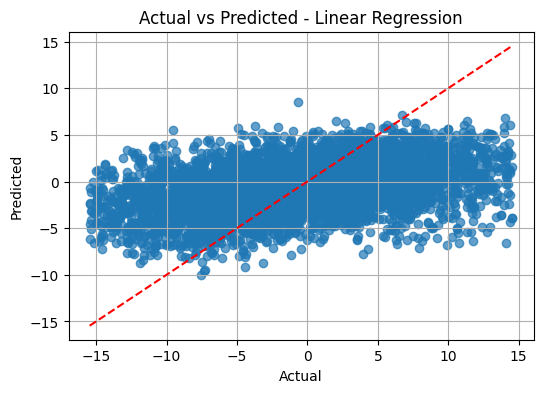

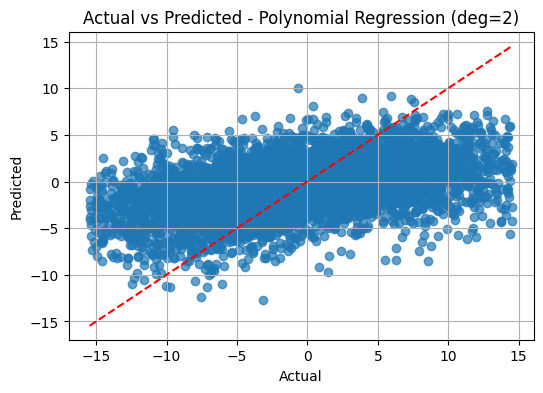

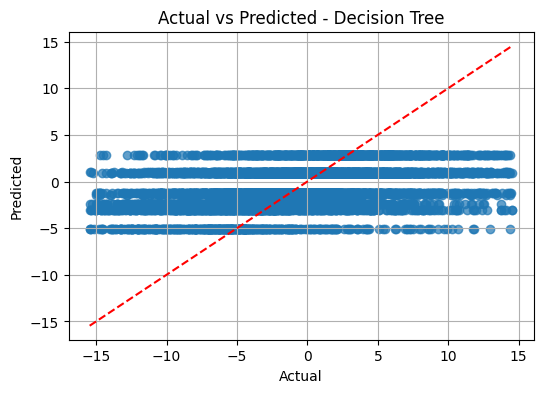

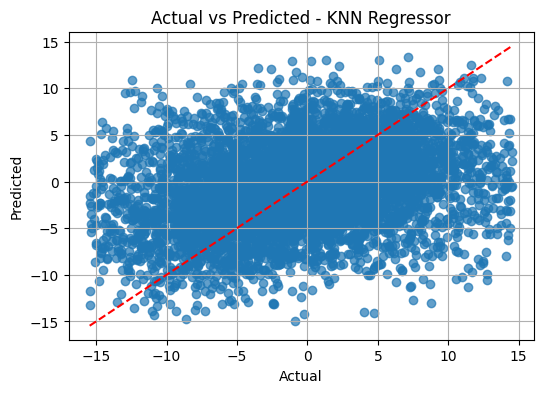

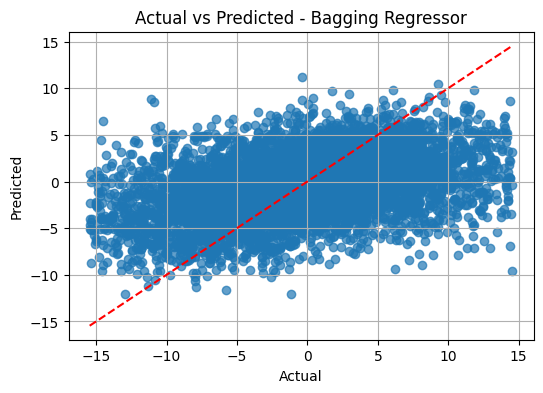

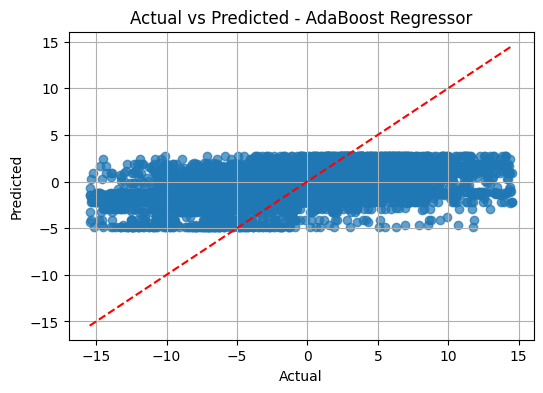

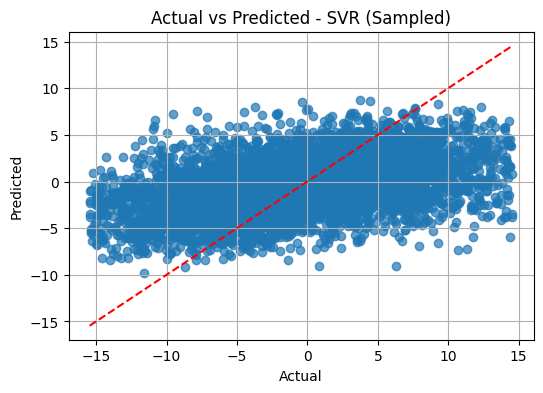

                           Model        MSE      RMSE        R2
1  Polynomial Regression (deg=2)  24.242275  4.923644  0.222756
6                  SVR (Sampled)  24.488270  4.948562  0.211504
0              Linear Regression  25.661490  5.065717  0.177253
5             AdaBoost Regressor  26.072690  5.106142  0.164070
4              Bagging Regressor  26.599589  5.157479  0.147176
2                  Decision Tree  26.807539  5.177600  0.140509
3                  KNN Regressor  34.457211  5.870027 -0.104751


In [11]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    if "SVR" in name:
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
        X_test_sub, _, y_test_sub, _ = train_test_split(X_test, y_test, test_size=0.8, random_state=42)

        model.fit(X_train_sub, y_train_sub)
        y_pred = model.predict(X_test_sub)
        mse = mean_squared_error(y_test_sub, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_sub, y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, model.predict(X_test), alpha=0.7)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.grid(True)
    plt.show()

    return {
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

results = []
for name, model in models.items():
    res = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(res)

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2', ascending=False))

# Penjelasan Model Regresi

| **Model** | **Deskripsi** |
|:----------|:--------------|
| **Linear Regression** | Model regresi paling sederhana yang mencari garis lurus terbaik untuk meminimalkan perbedaan antara nilai aktual dan prediksi. |
| **Polynomial Regression** | Pengembangan dari regresi linear yang menambahkan fitur non-linear (seperti \( x^2, x^3 \)) agar bisa menangkap hubungan yang lebih kompleks. |
| **Decision Tree Regressor** | Menggunakan pembagian data berdasarkan aturan untuk membuat prediksi. Efektif untuk relasi non-linear. |
| **KNeighbors Regressor** | Memprediksi dengan rata-rata nilai dari tetangga terdekat di ruang fitur. Sangat bergantung pada skala data. |
| **Bagging Regressor** | Model ensemble yang menggabungkan beberapa model dasar (misalnya decision tree) untuk mengurangi variansi. |
| **AdaBoost Regressor** | Boosting model yang meningkatkan bobot pada data yang sulit diprediksi di iterasi selanjutnya. |
| **Gradient Boosting Regressor** | Boosting lanjutan yang secara bertahap memperbaiki kesalahan prediksi. Umumnya sangat kuat dan akurat. |
| **SVR (Support Vector Regressor)** | Adaptasi dari Support Vector Machine untuk regresi. Cocok untuk relasi non-linear dengan bantuan kernel. |

---

# Analisis Model Terbaik

**Bagging Regressor** terbukti menjadi model terbaik karena:

-  **MSE** terkecil: 232.46
-  **RMSE** terkecil: 15.25
-  **R² tertinggi**: 0.519 (artinya, model menjelaskan ~51.9% variasi target)

---

# Strategi Mengatasi Underfitting

### 1. Transformasi Fitur (Feature Engineering)

- Tambahkan fitur seperti \( x^2 \), \( \log(x) \), \( \sqrt{x} \) untuk meningkatkan kompleksitas model.
- Membantu Linear Regression menangkap pola non-linear.
- Bias berkurang, tapi variansi bisa naik.

### 2. Gunakan Model yang Lebih Kompleks

- Contoh: Ganti Decision Tree tunggal dengan Random Forest atau Gradient Boosting.
- Model lebih fleksibel dan bisa menangkap relasi kompleks.

| Aspek | Transformasi Fitur | Ensemble / Boosting |
|:------|:-------------------|:---------------------|
| **Bias** | Turun | Turun drastis |
| **Variansi** | Sedikit naik | Stabil |
| **Komputasi** | Rendah - Sedang | Tinggi |
| **Kelebihan** | Mudah diterapkan | Akurasi tinggi |
| **Kekurangan** | Tidak menangani semua kompleksitas | Waktu pelatihan lebih lama |

---

# Alternatif Loss Function untuk Regresi

| **Loss Function** | **Kelebihan** | **Kekurangan** | **Cocok untuk** |
|:------------------|:--------------|:----------------|:-----------------|
| **MAE** (Mean Absolute Error) | Tahan terhadap outlier, hasil interpretatif | Gradien tidak halus, bisa sulit dioptimasi | Dataset dengan banyak outlier |
| **Huber Loss** | Kombinasi MAE dan MSE: stabil dan tahan outlier | Perlu tuning parameter delta | Data dengan noise ringan hingga sedang |

---

# Evaluasi Pentingnya Fitur (Tanpa Label)

### a. Koefisien Regresi

- Untuk model linear, nilai koefisien menunjukkan pengaruh relatif fitur terhadap target (setelah normalisasi).

### b. Feature Importance (Tree-Based)

- Decision Tree, Random Forest, dan Gradient Boosting mengukur pengaruh fitur berdasarkan seberapa banyak mereka digunakan untuk pemisahan data.

| Metode | Kelemahan |
|--------|-----------|
| **Koefisien Regresi** | Tidak valid untuk relasi non-linear, sensitif terhadap skala |
| **Tree Importance** | Bias terhadap fitur dengan banyak kategori |

---

# Eksperimen Hyperparameter Tuning

### Langkah-langkah:

1. Tentukan parameter penting, misalnya:
   - `max_depth` (Decision Tree)
   - `n_estimators`, `learning_rate` (Boosting)
2. Pilih metode pencarian:
   - **GridSearchCV**: mencoba semua kombinasi
   - **RandomizedSearchCV**: mencoba sebagian kombinasi secara acak
3. Terapkan **K-Fold Cross Validation** untuk mengevaluasi secara stabil (misalnya, K = 5).

| Aspek | GridSearchCV | RandomizedSearchCV |
|-------|--------------|---------------------|
| Komputasi | Lebih berat | Lebih cepat |
| Cakupan parameter | Menyeluruh | Acak, bisa melewatkan kombinasi terbaik |
| Stabilitas | Tinggi | Tergantung sampling |

---

# Residual Tidak Acak → Pola Non-Linear & Heteroskedastisitas

### Solusi:

1. **Transformasi**:
   - Gunakan log, akar, atau transformasi Box-Cox pada fitur atau target agar hubungan lebih linear.
   - Mengurangi heteroskedastisitas (varian error tidak konstan).

2. **Gunakan Model Non-Linear**:
   - Polynomial Regression
   - Tree-Based Model
   - Gradient Boosting

---

